# $\textbf{ Интерполяция алгебраическими многочленами}$

In [63]:
from scipy import interpolate

In [2]:
from scipy import linalg

In [3]:
from numpy import polynomial as P

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
x = np.array([1, 2, 3, 4])

In [8]:
y = np.array([1, 3, 5, 4])

In [9]:
deg = len(x) - 1

In [10]:
A = P.polynomial.polyvander(x,deg)
A

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.]])

In [11]:
c = linalg.solve(A,y)
c

array([ 2. , -3.5,  3. , -0.5])

Получен вектор коэффициентов [2, -3.5, 3, -0.5], то есть интерполяционный полином $f (x) = 2 - 3.5x + 3x^2 - 0.5x^3$.

Используем найденный массив коэффициентов для создания интерполяционного полинома и дальнейшего вычисления значения в точке:

In [12]:
f1 = P.Polynomial(c) #писпасть с как полинома
f1

Polynomial([ 2. , -3.5,  3. , -0.5], [-1,  1], [-1,  1])

In [13]:
f1(3)

4.9999999999999991

Найдем интерполяционный многочлен в другом базисе, например, многочленов Чебышева:

# многочленов Чебышева:

In [14]:
A = P.chebyshev.chebvander(x,deg)
A

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    7.,   26.],
       [   1.,    3.,   17.,   99.],
       [   1.,    4.,   31.,  244.]])

In [15]:
c = linalg.solve(A,y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

Как и ожидалось, в другом базисе получились другие коэффициенты и интерполяционный многочлен в базисе Чебышева, $$f (x) = 3.5T_0(x)- 3.875T_1(x)+1.5T_2(x)- 0.125T_3(x)$$ Однако, не зависимо от базиса, интерполяционный многочлен единственный и вычисляя значение в точке получаем такое же число:

In [16]:
f2 = P.Chebyshev(c)
f2

Chebyshev([ 3.5  , -3.875,  1.5  , -0.125], [-1,  1], [-1,  1])

In [17]:
f2(4)

3.9999999999999996

$\textbf{Получили одиковые ответы с помощью f1 или f2}$

Посмотрим на эти два полинома вместе на одном графике:

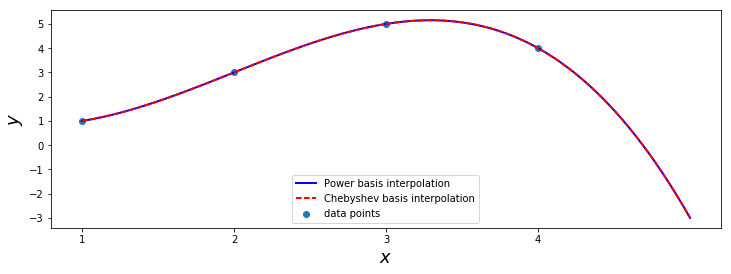

In [18]:
xx = np.linspace(x.min(), y.max(), 100)
fig,ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(x,y,label='data points')
ax.plot(xx, f1(xx), 'b', lw=2, label="Power basis interpolation")
ax.plot(xx, f2(xx),'r--', lw=2, label='Chebyshev basis interpolation')
ax.legend(loc=8)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

# $\textbf{Метод fit - НАДО РЕШАТЬ ВОТ ТАК}$

$\textbf{Используем метод fit для степенного полинома и полинома Чебышева:}$

In [19]:
f1b = P.Polynomial.fit(x,y,deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], [ 1.,  4.], [-1.,  1.])

In [20]:
f2b = P.Chebyshev.fit(x,y,deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], [ 1.,  4.], [-1.,  1.])

In [21]:
f1b(2)

3.0000000000000004

{Заметим, что этот метод автоматически устанавливает атрибут domain в правильное значение (в примере отрезок был от 1 до 4), коэффициенты устанавливаются тоже соответствующим образом.}

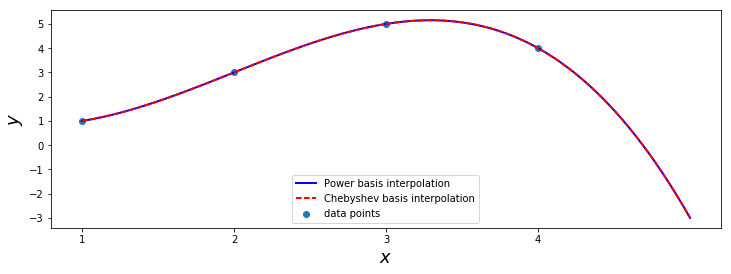

In [22]:
xx = np.linspace(x.min(), y.max(), 100)
fig,ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(x,y,label='data points')
ax.plot(xx, f1b(xx), 'b', lw=2, label="Power basis interpolation")
ax.plot(xx, f2b(xx),'r--', lw=2, label='Chebyshev basis interpolation')
ax.legend(loc=8)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

$\textbf{Не понятно}$

In [23]:
 np.linalg.cond(P.chebyshev.chebvander(x,deg)) # x = [1, 2, 3, 4]

4659.7384241404316

$$\frac{2x-5}{3}$$

In [24]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0,deg))# (2*x-5)/3.0 = [-1, -5/3, 1/3, 1]

1.8542033440472903

откуда взялись эти х и $\frac{2x-5}{3.0}$? Уравнение транформации, переводящее 1 в -1 и 4 в 1 есть $\frac{2x-5}{3}$(его можно найти самим)

# Пример интерполяции функции Рунге

Интерполяция многочленами небольшого количества точек - мощный и полезный математический инструмент.
Но если количество точек растет, то растет и наибольшая степень интерполяционного многочлена, что приводит к проблемам.

Полученная функция резко изменяется за пределами отрезка интерполяции. Но что более неприятно, полиномы высокой степени нехорошо себя ведут и между точками интерполяции. Хотя в точках значения полиномов разных степеней совпадают, но между ними начинают появляться биения.

Возьмем функцию Рунге $f(x) =\frac{1}{(1+25x^2)}$, достаточно ровную на интервале [-1,1]. Результат интерполяции почти расходится в промежутке между точками у конца интервала интерполяции.

Для иллюстрации этого поведения напишем функцию runge, которая реализует функцию Рунге, и функцию runge_interpolate, которая находит интерполяцию n-той степени в степенном базисе.

$\textbf{Для пример решения задачи,}$

функция
$$f(x) =\frac{1}{(1+25x^2)}$$

In [25]:
def runge(x):
    return 1/(1 + 25*x**2)

In [26]:
def rung_interpolate(n):
    x = np.linspace(-1,1,n)
    p = P.Polynomial.fit(x,runge(x),deg=n)
    return x,p

Нарисуем графики исходной функции и интерполяционного многочлена 13 и 14 порядков:

/Users/myomaung/anaconda/lib/python3.6/site-packages/numpy/polynomial/polynomial.py:1407: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


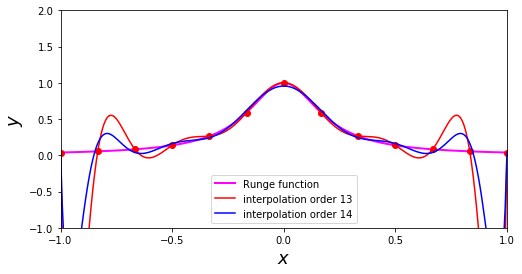

In [38]:
xx = np.linspace(-1,1,250)
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(xx,runge(xx),'magenta',lw=2,label="Runge function")

# 13th oder interpolation of the Runge function
n = 13
x,p = rung_interpolate(n)
ax.plot(x,runge(x),'ro')
ax.plot(xx,p(xx), 'r', label= "interpolation order %d"%n)

# 14th oder interpolation of the Runge function
n = 14
x,p = rung_interpolate(n)
#ax.plot(x,runge(x),'bo')
ax.plot(xx,p(xx), 'b', label= "interpolation order %d"%n)

ax.legend(loc=8)
ax.set_xlim(xx[0],xx[-1])
ax.set_ylim(-1,2)
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

# Интерполяция сплайнами

Для набора из n точек {xi, yi}, на интервале [x0, xn-1] получим n-1 подинтервал [xi, xi+1]. Внутренняя точка, которая соединяет два подинтервала, будем называть узлом в терминах кусочно-полиномиальной интерполяции. Для интерполяции n точек, будем использовать кусочное полиномы степени k на каждом подинтервале, т.е. мы должны определить (k+1)(n-1) неизвестных параметра. Значения в узлах дают 2(n-1) уравнения. Этих уравнений недостаточно для нахождения всех неизвестных. Но требование непрерывности производных более высоких порядков дадут нам необходимые уравнения.

Это условие гарантирует, что кусочно-полиномиальный интерполянт будет достаточно гладким.
Сплайн - это специальный тип кусочно-полиномиального интерполянта: кусочный полином степени k является сплайном, если он непрерывно дифференцируем k-1 раз.

Наиболее популярным является сплайн 3 степени, k=3, который требует 4(n-1) параметр. В этом случае непрерывность двух производных в n-2 точках дает 2(n-2) дополнительных уравнения, повышая общее количество уравнений до 2 (n -1)+ 2(n - 2) = 4(n -1)- 2.
Остается 2 неопределенных параметра, которые мы должны определить другим способом.
Обычно задают дополнительное требование, чтобы производная второго порядка на концах точек была равна 0 (превращая в настоящий сплайн). Это дает еще 2 уравнения.

Модуль интерполяции SciPy? предоставляет несколько функций и классов для представления сплайн-интерполяции. Например, мы можем использвать функцию interpolate.interp1d, которая берет массивы х и у для точек как первый и второй аргументы. Дополнительные аргументы позволяют задать тип и порядок интерполяции. Обычно задают kind=3 (или, что тоже самое, kind='cubic') для вычисления кубической интерполяции. Эта функция возвращает класс объектов, которые можно вызывать как функцию и которая может вычислять значения для различных значений х, используя вызовы функции.

Альтернативная сплайн-функция - это interpolate.InterpolatedUnivariateSpline, которая так же принимает массивы х и у в качестве первых двух аргументов, но которая использует аргумент k (вместо kind) для задания порядка сплайнов.

Посмотрим, как можно использовать функцию interpolate.interp1d для фунцкии Рунгде и возьмем сплайны 3 степени. Для этого мы сначала создадим массивы NumPy? для х и у координат в тех же точках. Дальше вызовем interpolate.interp1d с k=3 для получения кубических сплайнов на заданных данных

In [40]:
def runge(x):
    return 1/(1 + 25*x**2)

In [46]:
x = np.linspace(-1,1,11)
y = runge(x)
y

array([ 0.03846154,  0.05882353,  0.1       ,  0.2       ,  0.5       ,
        1.        ,  0.5       ,  0.2       ,  0.1       ,  0.05882353,
        0.03846154])

In [54]:
f_i = interpolate.interp1d(x,y,kind=3)
f_i

Для того, чтобы посмотреть насколько хороши сплайны, нарисуем исходную функцию Рунге, точки и кубические сплайны.

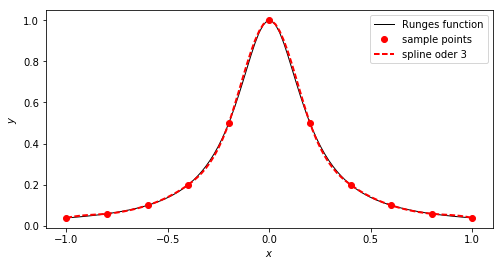

In [55]:
xx = np.linspace(-1,1,100)

fig,ax = plt.subplots(figsize=(8,4))

ax.plot(xx,runge(xx),'k',lw=1, label="Runges function")

ax.plot(x,y,'ro',label='sample points')

ax.plot(xx,f_i(xx),'r--',lw=2, label="spline oder 3")

ax.legend(loc=1)
ax.set_xticks([-1,-0.50,0,0.5,1])
ax.set_ylabel(r"$y$")
ax.set_xlabel(r"$x$")

Для иллюстрации влияния порядка сплайна, решим задачу интерполяции на точках (0,3), (1, 4), (2, 3.5), (4, 2), (5, 1.5), (6, 1.25) и (7, 0.7) со сплайнами возрастающей степени.

Сначала определим массивы х и у, далее в цикле будем изменять требуемый порядок интерполяции, вычисляя интерполянт и рисуя его:

In [56]:
x = np.array([0,1,2,3,4,5,6,7])

In [57]:
y = np.array([3,4,3.5,2,1,1.5,1.25,0.9])

In [58]:
len(x)

8

In [59]:
len(y)

8

In [60]:
xx = np.linspace(x.min(), x.max(), 100)

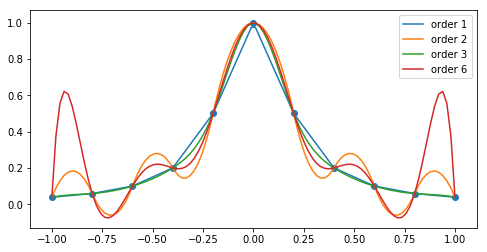

In [45]:
fig,ax = plt.subplots(figsize=(8,4))

ax.scatter(x,y)

for n in [1,2,3,6]:
    f = interpolate.interp1d(x,y,kind=n)
    ax.plot(xx,f(xx),label="order %d"%n)
ax.legend()

$\textbf{Можно проще?}$

Можно. Если точек немного используйте интерполяцию (степенную) модуля sympy:

http://docs.sympy.org/latest/modules/polys/reference.html

Для точек {(1,1), (2, 4), (3, 9), (4, 16)}

In [66]:
interpolate([(-1,2),(1,2),(2,5)],x)

TypeError: 'module' object is not callable